# Gold and Fed Balance Sheet

In [185]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf  

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark-palette')

import PyDSWS as PyDSWS
ds = PyDSWS.Datastream(username='x', password='x')

df = ds.get_data(tickers='USRAC.N, GOLDBLN',
                  start="2003-01-01",end="0", freq="W")

df.columns= ['fedbs', 'gold']

In [186]:
df.corr().round(2)

,fedbs,gold
fedbs,1.00,0.77
gold,0.77,1.00


In [187]:
linmodel = smf.ols('gold ~ fedbs', data = df).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1357.
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.13e-183
Time:                        22:43:34   Log-Likelihood:                -6415.2
No. Observations:                 917   AIC:                         1.283e+04
Df Residuals:                     915   BIC:                         1.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    522.9483     17.197     30.408      0.000     489.197     556.699
fedbs          0.0002   5.52e-06     36.833      0.000       0.000       0.000
==============================================================================
Omnibus:                      101.625   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.299
Skew:                           0.944   Prob(JB):                     2.53e-30
Kurtosis:                       2.999   Cond. No.                     6.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
from scipy import stats

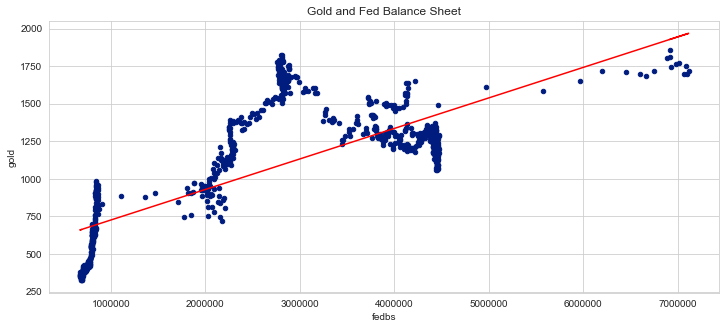

In [218]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(df['fedbs'],df['gold'])

new_regr = intercept + slope * df['fedbs']

df.plot.scatter(x='fedbs', y='gold',title='Gold and Fed Balance Sheet',figsize=(12,5))
plt.plot(df['fedbs'],new_regr, color='red');

Good luck with the market!

Guillaume

Fierce Research